In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import minmax_scale, normalize
import seaborn as sn
%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253237 entries, 0 to 253236
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATETIME          253237 non-null  object 
 1   GAS               253237 non-null  int64  
 2   COAL              253237 non-null  int64  
 3   NUCLEAR           253237 non-null  int64  
 4   WIND              253237 non-null  int64  
 5   HYDRO             253237 non-null  int64  
 6   IMPORTS           253237 non-null  int64  
 7   BIOMASS           253237 non-null  int64  
 8   OTHER             253237 non-null  int64  
 9   SOLAR             253237 non-null  int64  
 10  STORAGE           253237 non-null  int64  
 11  GENERATION        253237 non-null  int64  
 12  CARBON_INTENSITY  253237 non-null  int64  
 13  LOW_CARBON        253237 non-null  int64  
 14  ZERO_CARBON       253237 non-null  int64  
 15  RENEWABLE         253237 non-null  int64  
 16  FOSSIL            25

<AxesSubplot:>

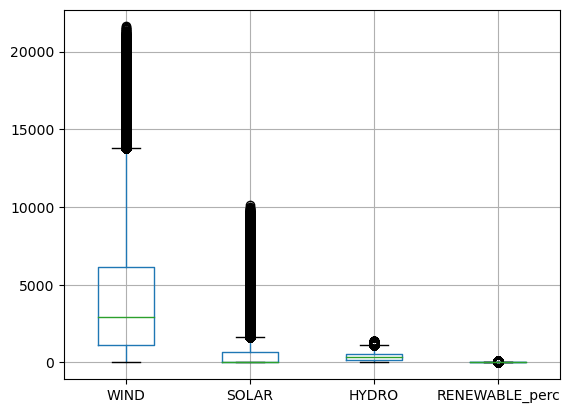

In [12]:

S_Data=pd.read_csv("C:/Users/paulo/Downloads/Final_Project/Final_Project/.spyproject/Codes/Generation_sources.csv")

S_Data.info()

S_Data2= S_Data.loc[:, ['DATETIME','WIND','SOLAR','HYDRO','RENEWABLE_perc']]

S_Data3= S_Data.loc[:, ['RENEWABLE','FOSSIL']]

S_Data4= S_Data.loc[:, ['DATETIME','WIND','SOLAR','HYDRO']]

S_Data2.boxplot()

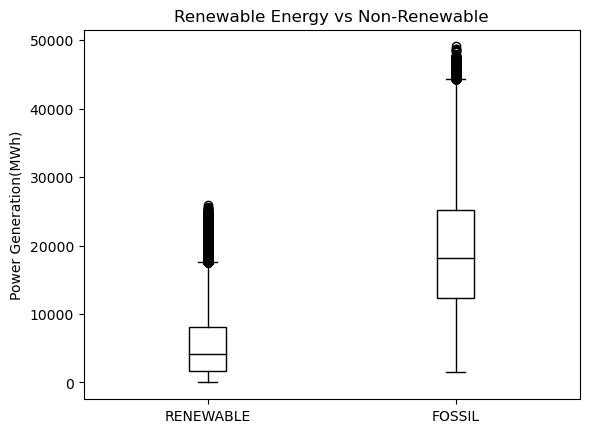

In [13]:
S_Data3.boxplot(patch_artist= True, boxprops= dict(facecolor='white', color='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'), medianprops=dict(color='black'))
plt.title('Renewable Energy vs Non-Renewable')
plt.ylabel('Power Generation(MWh)')
plt.grid(visible=False)
plt.show()


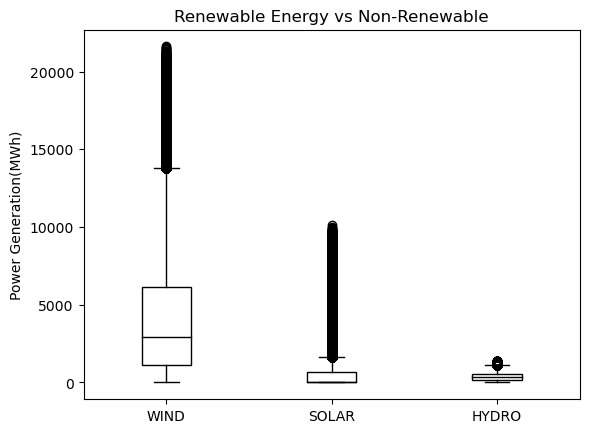

In [14]:
S_Data4.boxplot(patch_artist= True, boxprops= dict(facecolor='white', color='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'), medianprops=dict(color='black'))
plt.title('Renewable Energy vs Non-Renewable')
plt.ylabel('Power Generation(MWh)')
plt.grid(visible=False)
plt.show()


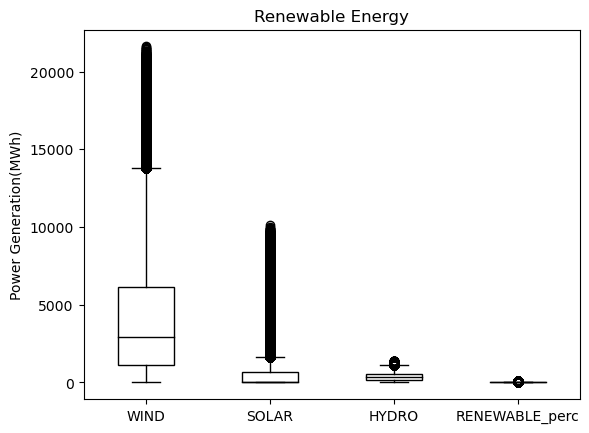

In [15]:
S_Data2.boxplot(patch_artist= True, boxprops= dict(facecolor='white', color='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'), medianprops=dict(color='black'))
plt.title('Renewable Energy')
plt.ylabel('Power Generation(MWh)')
plt.grid(visible=False)
plt.show()

In [16]:
S_Data2['DATETIME'] = pd.to_datetime(S_Data2['DATETIME']).dt.date

S_Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253237 entries, 0 to 253236
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATETIME        253237 non-null  object 
 1   WIND            253237 non-null  int64  
 2   SOLAR           253237 non-null  int64  
 3   HYDRO           253237 non-null  int64  
 4   RENEWABLE_perc  253237 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.7+ MB


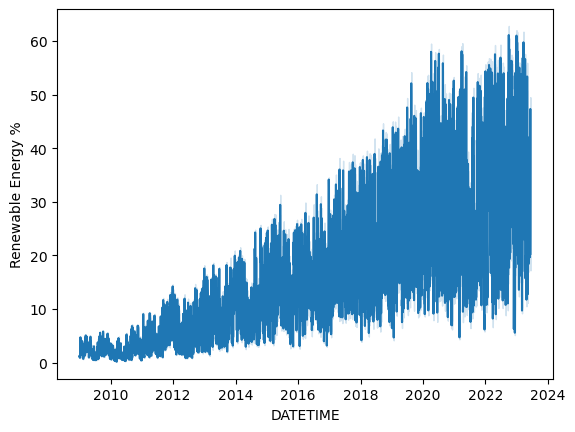

In [17]:
sn.lineplot(data =S_Data2, x='DATETIME', y='RENEWABLE_perc')
plt.xlabel('DATETIME')
plt.ylabel('Renewable Energy %')
plt.show()


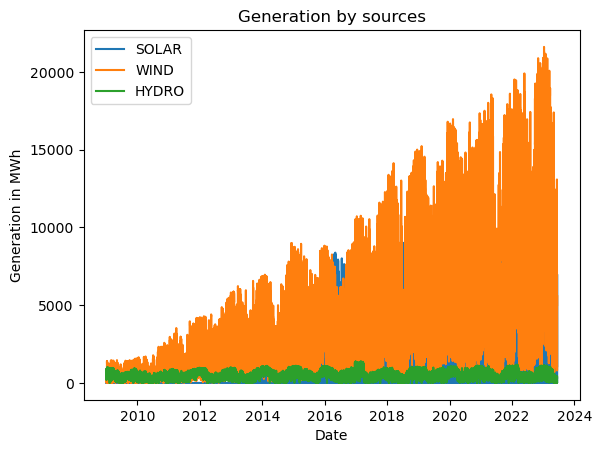

In [18]:
plt.plot(S_Data2['DATETIME'], S_Data2['SOLAR'], label='SOLAR')
plt.plot(S_Data2['DATETIME'], S_Data2['WIND'],  label='WIND')
plt.plot(S_Data2['DATETIME'], S_Data2['HYDRO'], label='HYDRO')
plt.xlabel('Date')
plt.ylabel('Generation in MWh')
plt.title('Generation by sources')
plt.legend()
plt.show()

In [19]:
# _________________________Select rows within a date range by year 2014________________________________________
start_date = pd.to_datetime('2014-01-01 00:00:00+00')
end_date = pd.to_datetime('2014-12-31 23:30:00+00')
Sources_2014 = S_Data2[(S_Data2['DATETIME'] >= start_date) & (S_Data2['DATETIME'] <= end_date)]


C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [24]:

Sources_2014.head()



,DATETIME,WIND,SOLAR,HYDRO,RENEWABLE_perc
87648,2014-01-01,4469,0,768,16.4
87649,2014-01-01,4601,0,767,16.4
87650,2014-01-01,4686,0,708,16.5
87651,2014-01-01,4774,0,716,17.2
87652,2014-01-01,4670,0,702,17.3


In [23]:
Sources_2014.tail()

,DATETIME,WIND,SOLAR,HYDRO,RENEWABLE_perc
105163,2014-12-31,7037,0,459,22.6
105164,2014-12-31,7017,0,456,22.5
105165,2014-12-31,7034,0,451,22.9
105166,2014-12-31,6964,0,448,24.2
105167,2014-12-31,6836,0,451,23.9


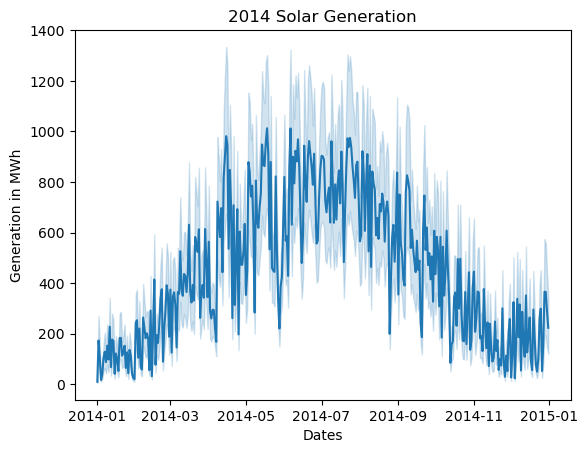

In [25]:
#Year 2014 graph of solar generation
sn.lineplot(data =Sources_2014, x='DATETIME', y='SOLAR')
plt.xlabel('Dates')
plt.ylabel('Generation in MWh')
plt.title('2014 Solar Generation')
plt.show()


In [26]:
# Select rows within a date range by MONTH
start_date1 = pd.to_datetime('2014-01-01 00:00:00+00')
end_date1 = pd.to_datetime('2014-01-31 23:30:00+00')
Sources_month1 = S_Data2[(S_Data2['DATETIME'] >= start_date1) & (S_Data2['DATETIME'] <= end_date1)]


C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [28]:
Sources_month1

,DATETIME,WIND,SOLAR,HYDRO,RENEWABLE_perc
87648,2014-01-01,4469,0,768,16.4
87649,2014-01-01,4601,0,767,16.4
87650,2014-01-01,4686,0,708,16.5
87651,2014-01-01,4774,0,716,17.2
87652,2014-01-01,4670,0,702,17.3
...,...,...,...,...,...
89131,2014-01-31,4418,0,597,12.6
89132,2014-01-31,4473,0,593,13.3
89133,2014-01-31,4587,0,583,14.3
89134,2014-01-31,4651,0,556,15.1


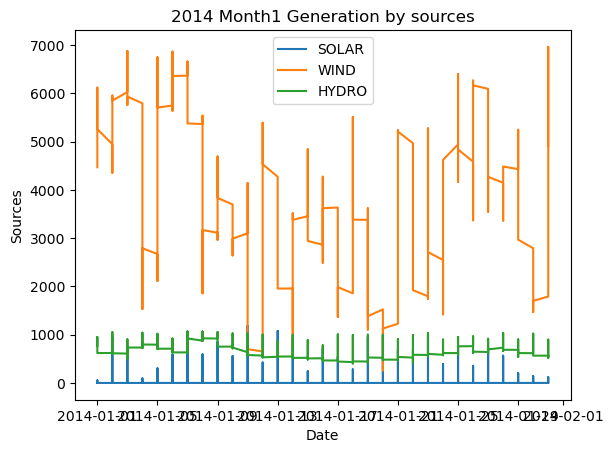

In [29]:
#Plotting the three different sources at same time
plt.plot(Sources_month1['DATETIME'], Sources_month1['SOLAR'], label='SOLAR')
plt.plot(Sources_month1['DATETIME'], Sources_month1['WIND'],  label='WIND')
plt.plot(Sources_month1['DATETIME'], Sources_month1['HYDRO'], label='HYDRO')
plt.xlabel('Date')
plt.ylabel('Sources')
plt.title('2014 Month1 Generation by sources')
plt.legend()
plt.show()


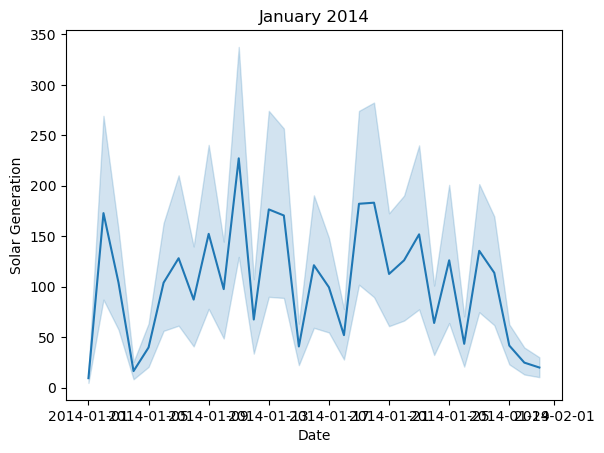

In [30]:
#Month January 2014 graph of solar
sn.lineplot(data =Sources_month1, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January 2014')
plt.show()

In [31]:
# Select rows January within a date range by week1
start_date2 = pd.to_datetime('2014-01-01 00:00:00+00')
end_date2 = pd.to_datetime('2014-01-07 23:30:00+00')
Sources_week1 = S_Data2[(S_Data2['DATETIME'] >= start_date2) & (S_Data2['DATETIME'] <= end_date2)]

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


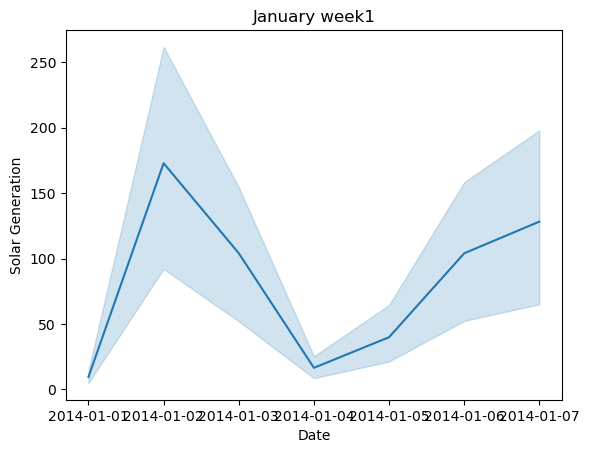

In [32]:
#week1 January 2014 graph of solar1
sn.lineplot(data =Sources_week1, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January week1')
plt.show()

In [33]:
# Select rows within a date range by week2
start_date3 = pd.to_datetime('2014-01-07 00:00:00+00')
end_date3 = pd.to_datetime('2014-01-14 23:30:00+00')
Sources_week2 = S_Data2[(S_Data2['DATETIME'] >= start_date3) & (S_Data2['DATETIME'] <= end_date3)]

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


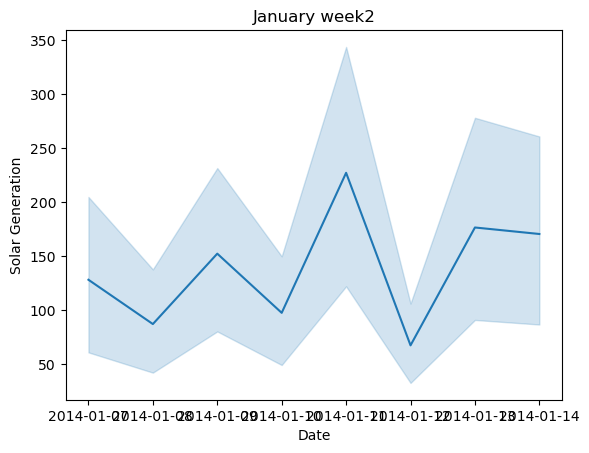

In [34]:
#week2 1 2014 graph of solar2
sn.lineplot(data =Sources_week2, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January week2')
plt.show()

In [35]:
# Select rows within a date range by week3
start_date4 = pd.to_datetime('2014-01-14 00:00:00+00')
end_date4 = pd.to_datetime('2014-01-21 23:30:00+00')
Sources_week3 = S_Data2[(S_Data2['DATETIME'] >= start_date4) & (S_Data2['DATETIME'] <= end_date4)]

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


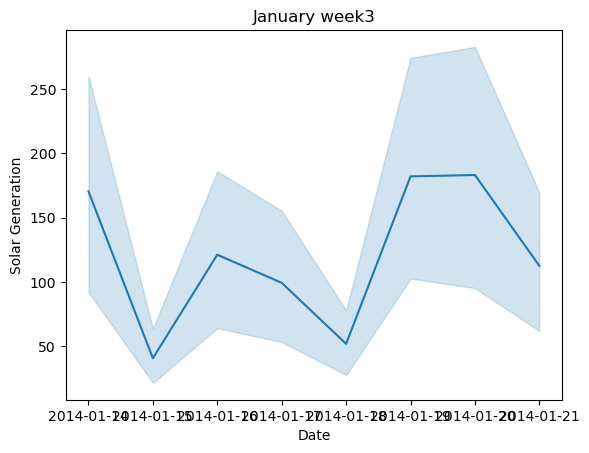

In [36]:
#week3 1 2014 graph of solar
sn.lineplot(data =Sources_week3, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January week3')
plt.show()

In [37]:
# Select rows within a date range by week3
start_date5 = pd.to_datetime('2014-01-21 00:00:00+00')
end_date5 = pd.to_datetime('2014-01-31 23:30:00+00')
Sources_week4 = S_Data2[(S_Data2['DATETIME'] >= start_date5) & (S_Data2['DATETIME'] <= end_date5)]

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


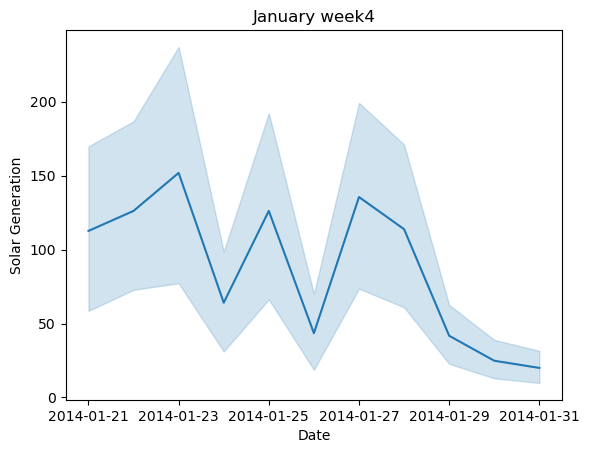

In [38]:
#week4 1 2014 graph of solar
sn.lineplot(data =Sources_week4, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January week4')
plt.show()

In [39]:
"""Inspecting month 11 of the data November"""
# Select rows within a date range by MONTH
july_start = pd.to_datetime('2014-07-01 00:00:00+00')
july_end = pd.to_datetime('2014-07-31 23:30:00+00')
july_2014 = S_Data2[(S_Data2['DATETIME'] >= july_start) & (S_Data2['DATETIME'] <=july_end)]

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


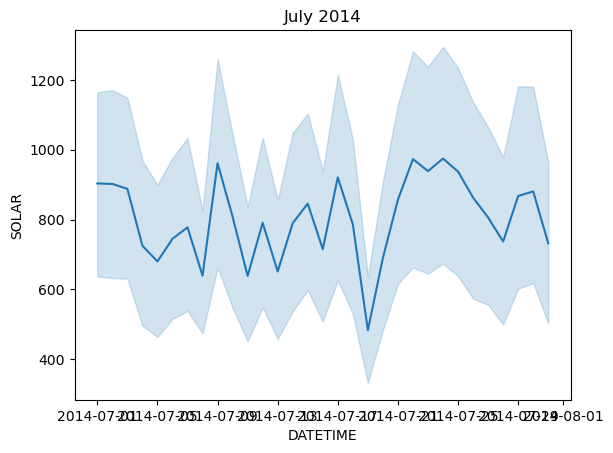

In [40]:
#Month July 2014 graph of solar
sn.lineplot(data =july_2014, x='DATETIME', y='SOLAR')
plt.xlabel('DATETIME')
plt.ylabel('SOLAR')
plt.title('July 2014')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


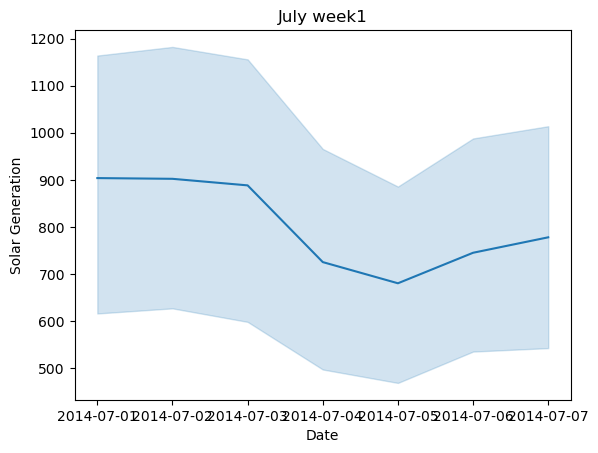

In [41]:
# Select rows July within a date range by week1
july_start1 = pd.to_datetime('2014-07-01 00:00:00+00')
july_end1 = pd.to_datetime('2014-07-07 23:30:00+00')
july_week1 = S_Data2[(S_Data2['DATETIME'] >= july_start1) & (S_Data2['DATETIME'] <=july_end1)]


#week1 July 2014 graph of solar1
sn.lineplot(data =july_week1, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('July week1')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


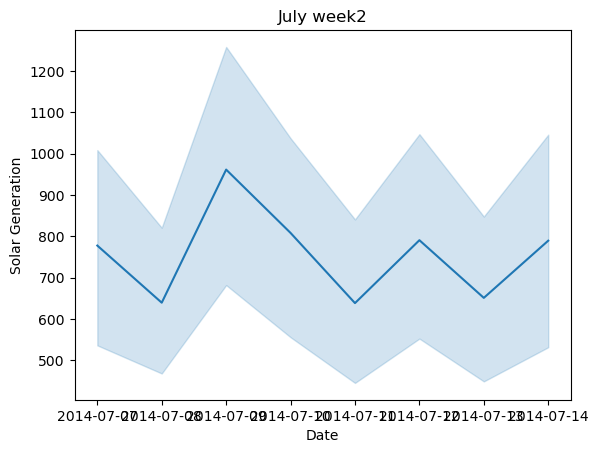

In [42]:
# Select rows within a date range by week2
july_start2 = pd.to_datetime('2014-07-07 00:00:00+00')
july_end2 = pd.to_datetime('2014-07-14 23:30:00+00')
july_week2 = S_Data2[(S_Data2['DATETIME'] >= july_start2) & (S_Data2['DATETIME'] <=july_end2)]


#week2 July 2014 graph of solar1
sn.lineplot(data =july_week2, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('July week2')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


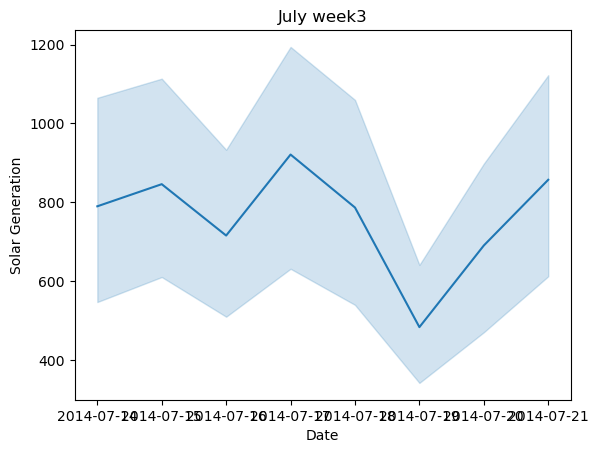

In [43]:
# Select rows within a date range by week3
july_start3 = pd.to_datetime('2014-07-14 00:00:00+00')
july_end3 = pd.to_datetime('2014-07-21 23:30:00+00')
july_week3 = S_Data2[(S_Data2['DATETIME'] >= july_start3) & (S_Data2['DATETIME'] <=july_end3)]


#week3 July 2014 graph of solar1
sn.lineplot(data =july_week3, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('July week3')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


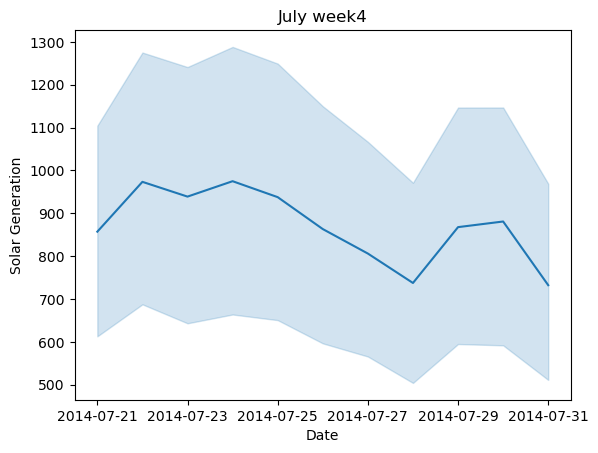

In [44]:
# Select rows within a date range by week4
july_start4 = pd.to_datetime('2014-07-21 00:00:00+00')
july_end4 = pd.to_datetime('2014-07-31 23:30:00+00')
july_week4 = S_Data2[(S_Data2['DATETIME'] >= july_start4) & (S_Data2['DATETIME'] <=july_end4)]


#week3 July 2014 graph of solar1
sn.lineplot(data =july_week4, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('July week4')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


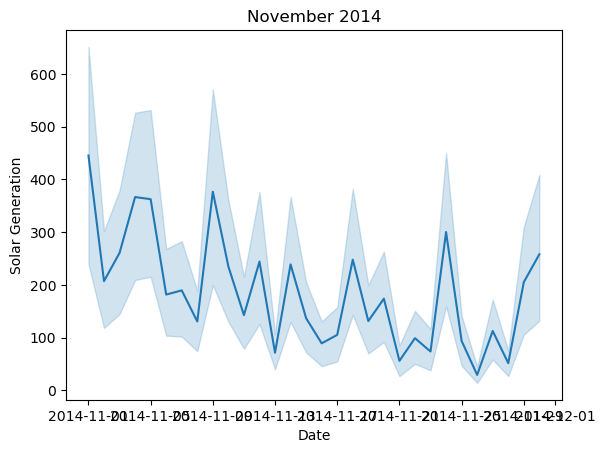

In [45]:
"""Inspecting month 11 of the data November"""

# Select rows within a date range by MONTH
Nov_start = pd.to_datetime('2014-11-01 00:00:00+00')
Nov_end = pd.to_datetime('2014-11-30 23:30:00+00')
Nov_2014 = S_Data2[(S_Data2['DATETIME'] >= Nov_start) & (S_Data2['DATETIME'] <=Nov_end)]

#Month November 2014 graph of solar
sn.lineplot(data =Nov_2014, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('November 2014')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


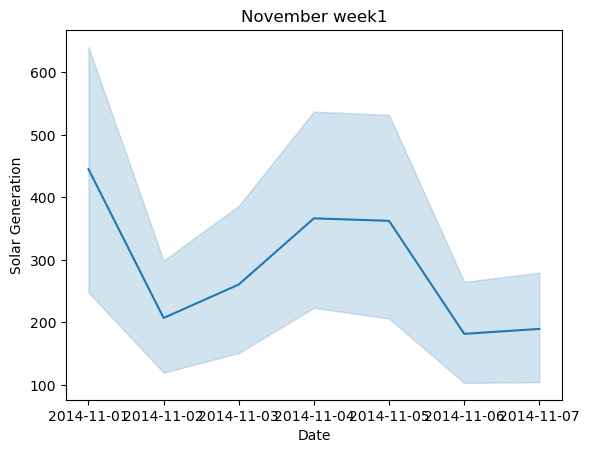

In [46]:
# Select rows November within a date range by week1
Nov_start1 = pd.to_datetime('2014-11-01 00:00:00+00')
Nov_end1 = pd.to_datetime('2014-11-07 23:30:00+00')
Nov_week1 = S_Data2[(S_Data2['DATETIME'] >= Nov_start1) & (S_Data2['DATETIME'] <=Nov_end1)]

#week1 November 2014 graph of solar1
sn.lineplot(data =Nov_week1, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('November week1')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


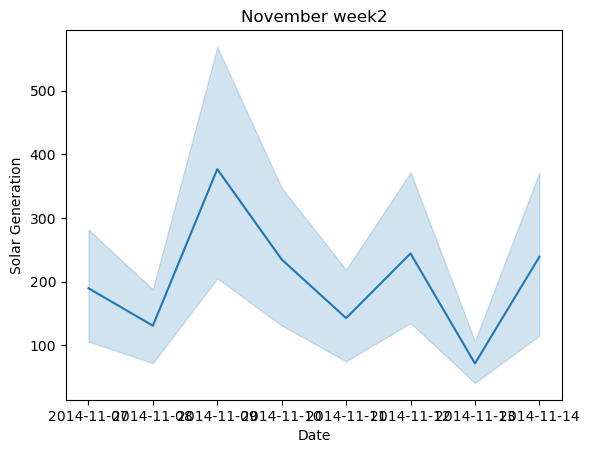

In [47]:
# Select rows November within a date range by week2
Nov_start2 = pd.to_datetime('2014-11-07 00:00:00+00')
Nov_end2 = pd.to_datetime('2014-11-14 23:30:00+00')
Nov_week2 = S_Data2[(S_Data2['DATETIME'] >= Nov_start2) & (S_Data2['DATETIME'] <=Nov_end2)]


#week2 November 2014 graph of solar1
sn.lineplot(data =Nov_week2, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('November week2')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


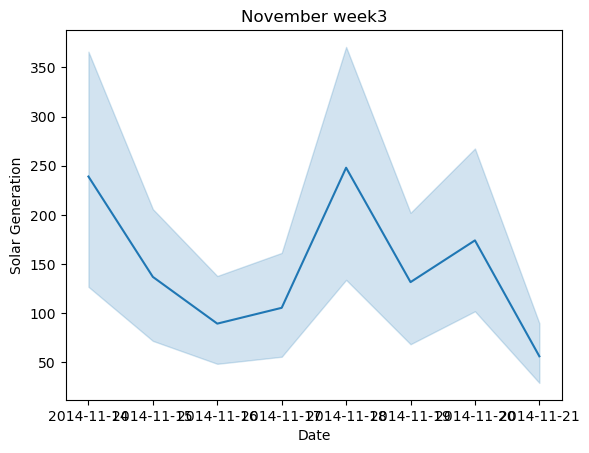

In [48]:
# Select rows November within a date range by week3
Nov_start3 = pd.to_datetime('2014-11-14 00:00:00+00')
Nov_end3 = pd.to_datetime('2014-11-21 23:30:00+00')
Nov_week3 = S_Data2[(S_Data2['DATETIME'] >= Nov_start3) & (S_Data2['DATETIME'] <=Nov_end3)]

#week3 November 2014 graph of solar1
sn.lineplot(data =Nov_week3, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('November week3')
plt.show()

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


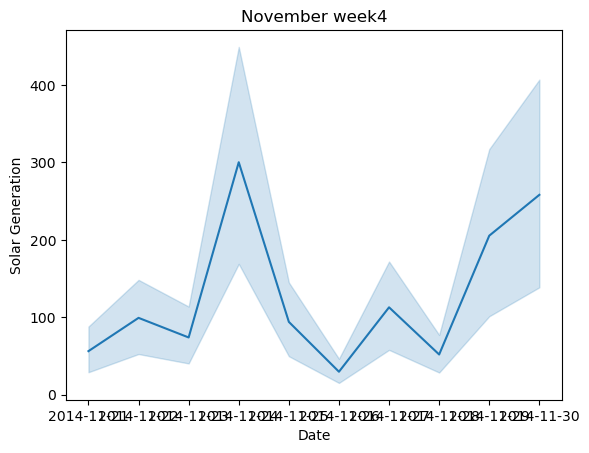

In [49]:
# Select rows November within a date range by week4
Nov_start4 = pd.to_datetime('2014-11-21 00:00:00+00')
Nov_end4 = pd.to_datetime('2014-11-30 23:30:00+00')
Nov_week4 = S_Data2[(S_Data2['DATETIME'] >= Nov_start4) & (S_Data2['DATETIME'] <=Nov_end4)]


#week3 July 2014 graph of solar1
sn.lineplot(data =Nov_week4, x='DATETIME', y='SOLAR')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('November week4')
plt.show()

In [53]:
"""_________________________Applying Moving average to the data sets__________________________"""

def moving_average(data, window_size):
    df = pd.DataFrame(data)
    rolling_mean = df.rolling(window=window_size).mean()
    filtered_data = rolling_mean.values.flatten()
    return filtered_data

In [54]:
data = S_Data2.loc[:, ['WIND']]
window_size = 200

filtered_data = moving_average(data, window_size)
print(filtered_data)


[     nan      nan      nan ... 6785.39  6774.975 6761.655]


In [76]:
Wind = pd.DataFrame(filtered_data)

wind_start == pd.Timestamp('2009-01-01 00:00:00')
wind_end == pd.Timestamp('2022-12-31 00:00:00')
interval = pd.Timedelta(minutes=30)

Wind["Date"] = pd.DataFrame({'Date': pd.date_range(start=wind_start, end=wind_end, freq=interval)})

Wind

,0,Date
0,NaN,2009-01-01 00:00:00
1,NaN,2009-01-01 00:30:00
2,NaN,2009-01-01 01:00:00
3,NaN,2009-01-01 01:30:00
4,NaN,2009-01-01 02:00:00
...,...,...
253232,6799.325,NaT
253233,6793.030,NaT
253234,6785.390,NaT
253235,6774.975,NaT


In [56]:
Wind2= Wind.rename(columns={0:'Wind Gen'})

Wind2

,Wind Gen,Date
0,NaN,2009-01-01 00:00:00
1,NaN,2009-01-01 00:30:00
2,NaN,2009-01-01 01:00:00
3,NaN,2009-01-01 01:30:00
4,NaN,2009-01-01 02:00:00
...,...,...
253232,6799.325,NaT
253233,6793.030,NaT
253234,6785.390,NaT
253235,6774.975,NaT


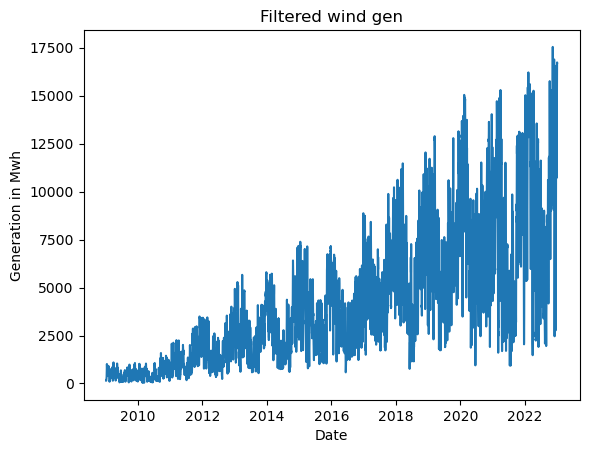

In [57]:
sn.lineplot(data =Wind2, x='Date', y='Wind Gen')
plt.xlabel('Date')
plt.ylabel('Generation in Mwh')
plt.title('Filtered wind gen')
plt.show()

[     nan      nan      nan ... 6785.39  6774.975 6761.655]


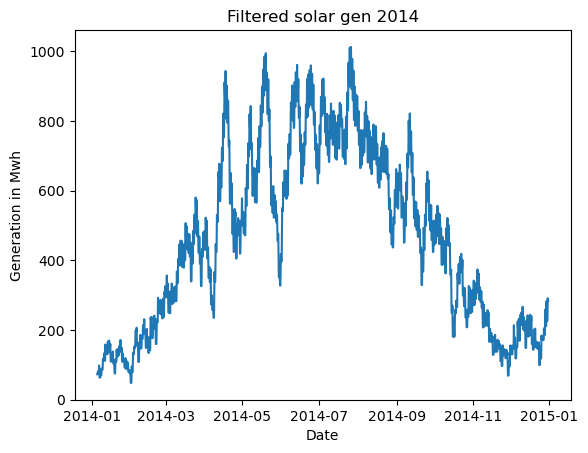

In [58]:
#Filtering for solar Year 2014
data1 = Sources_2014.loc[:, ['SOLAR']]
window_size = 200

filtered_solar2014 = moving_average(data1, window_size)
print(filtered_data)

Solar= pd.DataFrame(filtered_solar2014)

Solar= Solar.rename(columns={0:'Solar Gen'})

solar_start =pd.to_datetime('2014-01-01 00:00:00')
solar_end = pd.to_datetime('2014-12-31 00:00:00')
interval = pd.Timedelta(minutes=30)

Solar["Date"] = pd.DataFrame({'Date': pd.date_range(start=solar_start, end=solar_end, freq=interval)})

sn.lineplot(data = Solar, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Generation in Mwh')
plt.title('Filtered solar gen 2014')
plt.show()

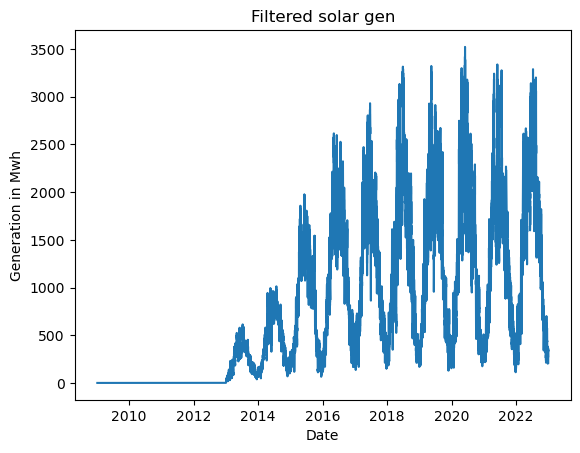

In [59]:
#Filtering for sources
data2 = S_Data2.loc[:, ['SOLAR']]
window_size = 200

Source_solar = moving_average(data2, window_size)

 
Sources_solar1= pd.DataFrame(Source_solar)

Sources_solar1 = Sources_solar1.rename(columns={0:'Solar Gen'})

ssolar_start =pd.to_datetime('2009-01-01 00:00:00')
ssolar_end = pd.to_datetime('2022-12-31 00:00:00')
interval = pd.Timedelta(minutes=30)

Sources_solar1["Date"] = pd.DataFrame({'Date': pd.date_range(start=ssolar_start, end=ssolar_end, freq=interval)})

sn.lineplot(data = Sources_solar1, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Generation in Mwh')
plt.title('Filtered solar gen')
plt.show()

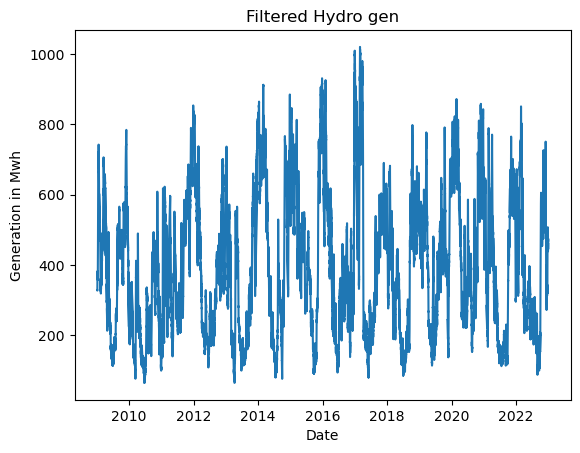

In [60]:
data3 = S_Data2.loc[:, ['HYDRO']]
window_size = 200

Source_hydro = moving_average(data3, window_size)

 
Sources_hydro = pd.DataFrame(Source_hydro)

Sources_hydro = Sources_hydro.rename(columns={0:'Hydro Gen'})

hydro_start =pd.to_datetime('2009-01-01 00:00:00')
hydro_end = pd.to_datetime('2022-12-31 00:00:00')
interval = pd.Timedelta(minutes=30)

Sources_hydro["Date"] = pd.DataFrame({'Date': pd.date_range(start=hydro_start, end=hydro_end, freq=interval)})

sn.lineplot(data = Sources_hydro, x='Date', y='Hydro Gen')
plt.xlabel('Date')
plt.ylabel('Generation in Mwh')
plt.title('Filtered Hydro gen')
plt.show()

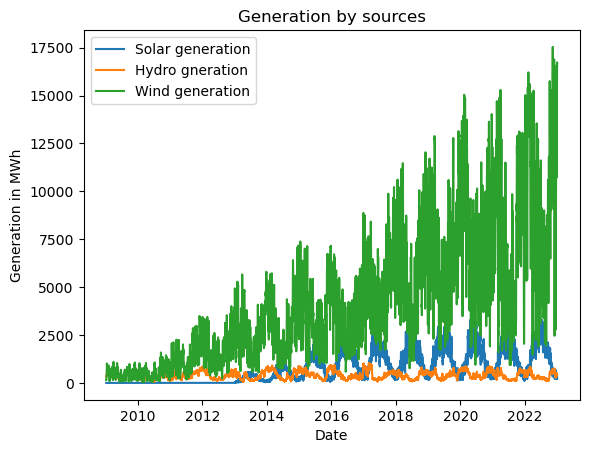

In [61]:
Filtered_sources= pd.merge(Sources_hydro, Sources_solar1, on='Date')

Filtered_sources2= pd.merge(Wind2, Sources_solar1, on='Date')

plt.plot(Filtered_sources['Date'], Filtered_sources['Solar Gen'], label='Solar generation')
plt.plot(Filtered_sources['Date'], Filtered_sources['Hydro Gen'],  label='Hydro gneration')
plt.plot(Filtered_sources2['Date'], Filtered_sources2['Wind Gen'], label='Wind generation')
plt.xlabel('Date')
plt.ylabel('Generation in MWh')
plt.title('Generation by sources')
plt.legend()
plt.show()

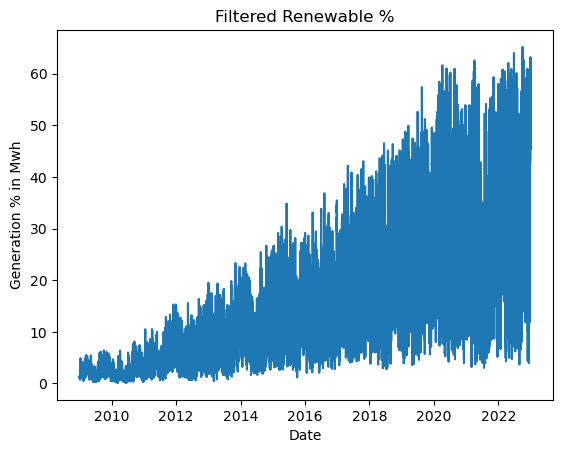

In [62]:
data4 = S_Data2.loc[:, ['RENEWABLE_perc']]
window_size1 = 25

Renew_perc = moving_average(data4, window_size1)

 
Renew_perc1 = pd.DataFrame(Renew_perc)

Renew_perc1= Renew_perc1.rename(columns={0:'Renew %'})

renew_start =pd.to_datetime('2009-01-01 00:00:00')
renew_end = pd.to_datetime('2022-12-31 00:00:00')
interval = pd.Timedelta(minutes=30)

Renew_perc1["Date"] = pd.DataFrame({'Date': pd.date_range(start=hydro_start, end=hydro_end, freq=interval)})

sn.lineplot(data = Renew_perc1, x='Date', y='Renew %')
plt.xlabel('Date')
plt.ylabel('Generation % in Mwh')
plt.title('Filtered Renewable %')
plt.show()

In [81]:
Sources_solar1

,Solar Gen,Date
0,NaN,2009-01-01 00:00:00
1,NaN,2009-01-01 00:30:00
2,NaN,2009-01-01 01:00:00
3,NaN,2009-01-01 01:30:00
4,NaN,2009-01-01 02:00:00
...,...,...
253232,2947.505,NaT
253233,2914.480,NaT
253234,2879.285,NaT
253235,2842.995,NaT


In [66]:
Filtered_sources.tail()

,Hydro Gen,Date,Solar Gen
62024972,96.425,NaT,2947.505
62024973,96.425,NaT,2914.480
62024974,96.425,NaT,2879.285
62024975,96.425,NaT,2842.995
62024976,96.425,NaT,2806.725


Filtering solar energy in 2014 year

In [84]:
start_date = pd.to_datetime('2014-01-01 00:00:00')
end_date = pd.to_datetime('2014-12-31 23:30:00')
Sourcesf_2014 = Sources_solar1[(Sources_solar1['Date'] >= start_date) & (Sources_solar1['Date'] <= end_date)]

In [85]:
Sourcesf_2014.head()

,Solar Gen,Date
87648,105.895,2014-01-01 00:00:00
87649,105.895,2014-01-01 00:30:00
87650,105.895,2014-01-01 01:00:00
87651,105.895,2014-01-01 01:30:00
87652,105.895,2014-01-01 02:00:00


In [ ]:
Sourcesf_2014.tail()

Text(0.5, 1.0, '2014 Filtered Solar Generation')

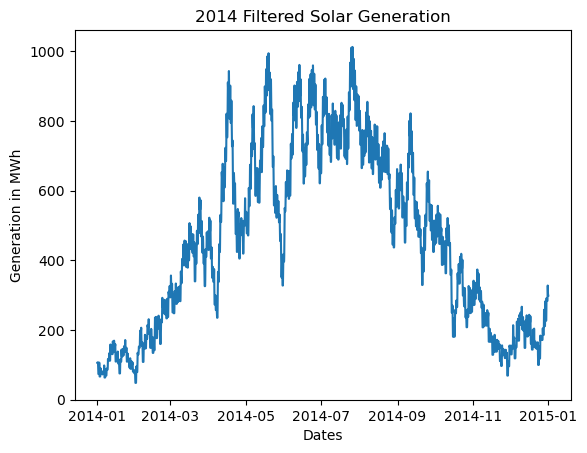

In [86]:
#Year 2014 graph of solar generation
sn.lineplot(data =Sourcesf_2014, x='Date', y='Solar Gen')
plt.xlabel('Dates')
plt.ylabel('Generation in MWh')
plt.title('2014 Filtered Solar Generation')

In [87]:
# Select rows within a date range by MONTH
start_date1 = pd.to_datetime('2014-01-01 00:00:00')
end_date1 = pd.to_datetime('2014-01-31 23:30:00')
Sourcesf_month1 = Sourcesf_2014[(Sourcesf_2014['Date'] >= start_date1) & (Sourcesf_2014['Date'] <= end_date1)]


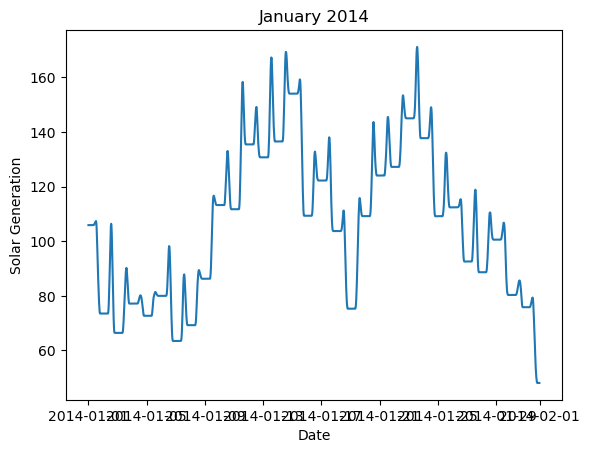

In [88]:
#Month January 2014 graph of solar
sn.lineplot(data =Sourcesf_month1, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January 2014')
plt.show()

In [99]:
# Select rows January within a date range by week1
start_date2 = pd.to_datetime('2014-01-01 00:00:00')
end_date2 = pd.to_datetime('2014-01-08 23:30:00')
Sourcesf_week1 =Sourcesf_month1[(Sourcesf_month1['Date'] >= start_date2) & (Sourcesf_month1['Date'] <= end_date2)]

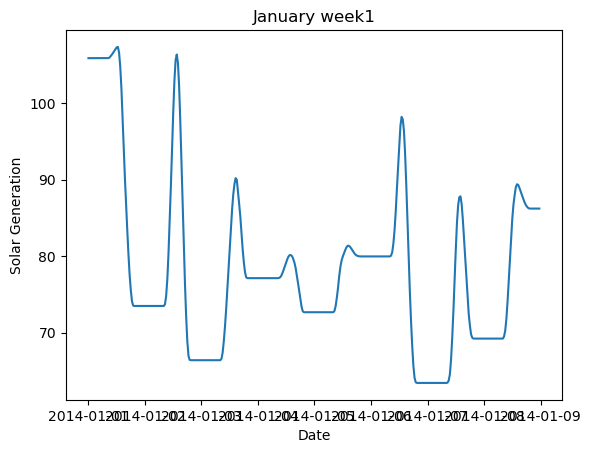

In [100]:
#week1 January 2014 graph of filtered solar1
sn.lineplot(data =Sourcesf_week1, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January week1')
plt.show()

In [101]:
# Select rows January within a date range by week1
start_date3 = pd.to_datetime('2014-01-08 00:00:00')
end_date3 = pd.to_datetime('2014-01-15 23:30:00')
Sourcesf_week2 =Sourcesf_month1[(Sourcesf_month1['Date'] >= start_date3) & (Sourcesf_month1['Date'] <= end_date3)]

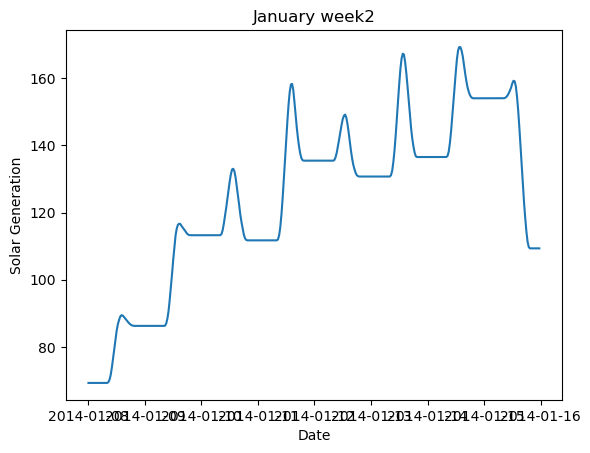

In [102]:
#week1 January 2014 graph of filtered solar1
sn.lineplot(data =Sourcesf_week2, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January week2')
plt.show()

In [103]:
# Select rows January within a date range by week1
start_date4 = pd.to_datetime('2014-01-15 00:00:00')
end_date4 = pd.to_datetime('2014-01-22 23:30:00')
Sourcesf_week3 =Sourcesf_month1[(Sourcesf_month1['Date'] >= start_date4) & (Sourcesf_month1['Date'] <= end_date4)]

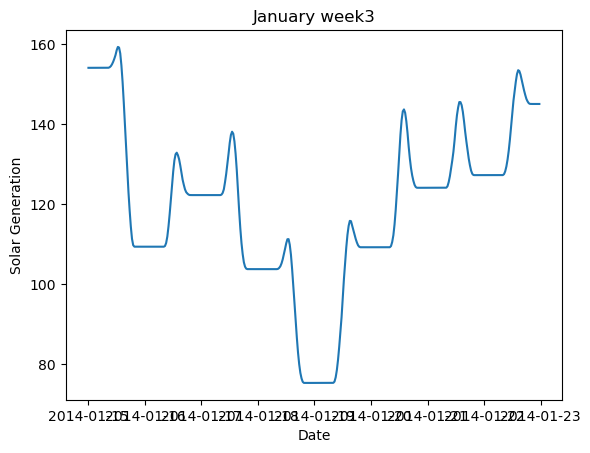

In [104]:
#week1 January 2014 graph of filtered solar1
sn.lineplot(data =Sourcesf_week3, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January week3')
plt.show()

In [105]:
# Select rows January within a date range by week1
start_date5 = pd.to_datetime('2014-01-22 00:00:00')
end_date5 = pd.to_datetime('2014-01-31 23:30:00')
Sourcesf_week4 =Sourcesf_month1[(Sourcesf_month1['Date'] >= start_date5) & (Sourcesf_month1['Date'] <= end_date5)]

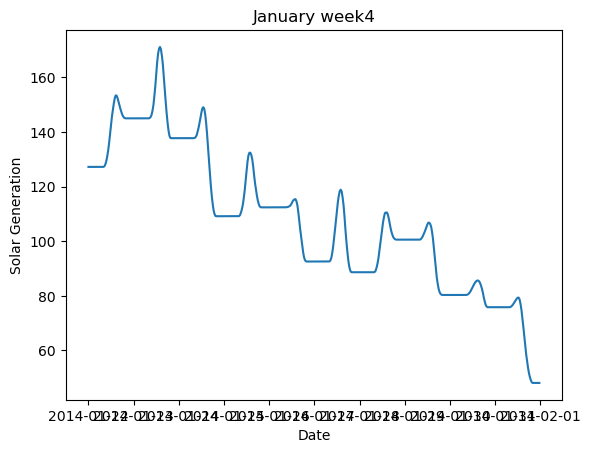

In [106]:
#week1 January 2014 graph of filtered solar1
sn.lineplot(data =Sourcesf_week4, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('January week4')
plt.show()

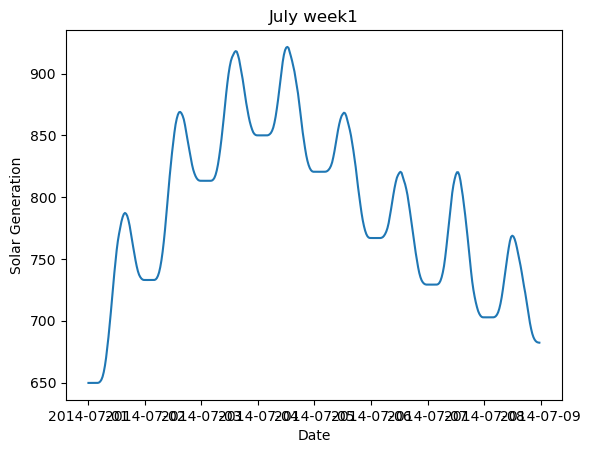

In [107]:
# Select rows July within a date range by week1
july_start1 = pd.to_datetime('2014-07-01 00:00:00')
july_end1 = pd.to_datetime('2014-07-08 23:30:00')
julyf_week1 = Sourcesf_2014[(Sourcesf_2014['Date'] >= july_start1) & (Sourcesf_2014['Date'] <=july_end1)]


#week1 July 2014 graph of solar1
sn.lineplot(data =julyf_week1, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('July week1')
plt.show()

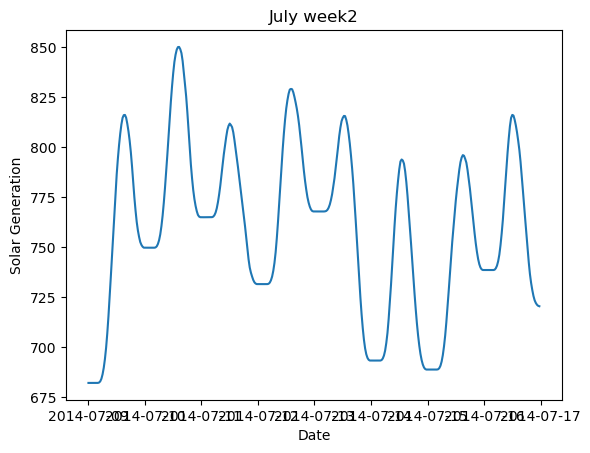

In [108]:
# Select filtered rows July within a date range by week2
july_start2 = pd.to_datetime('2014-07-09 00:00:00')
july_end2 = pd.to_datetime('2014-07-16 23:30:00')
julyf_week2 = Sourcesf_2014[(Sourcesf_2014['Date'] >= july_start2) & (Sourcesf_2014['Date'] <=july_end2)]


#week2 July 2014 graph of solar1
sn.lineplot(data =julyf_week2, x='Date', y='Solar Gen')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.title('July week2')
plt.show()